___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Lending Club Customers Data Analysis and Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will attempt to create a model that will help to predict in which kind of customers investors should invest.

Lending club had an [interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).  We will keep this context in mind. This data is from before they went public.

We will use lending data from 2007-2010 and attempt to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or use the csv already provided. The csv provided has been cleaned of NA values.

#### Applied Methods in this project

1) A Decision Tree Model and Random Forest Model is fit to the data, with the aim to predict if a loan was fully paid by a customer or not, and the results interpreted.    
2) Interesting visualizations helps with the interpretation of the data:
* A histogram displayng the numbers of customers who fulfilled (or who did not fulfill) the credit underwriting criteria of LendingClub.com.  The customers were plotted according to their FICO score.
* A histogram plotting the customers according to their FICO scores, but distinguish between customers who fully paid their loan and those who did not fully pay their loan.
* A jointplot displaying the interest rates customers received taking into account their FICO scores.
* A lmplot() showing the relationships between the FICO score of customers and the interest rate they received for both customers that fulfilled and those who did not fulfill the credit underwriting criteria of Lending Club.  The plot displays a plot for custormers who fully paid their loan and for those who did not fully pay their loan. 

Libraries used in this project are Pandas, Seaborn, Matplotlib and Scikit-learn.
 
This project was done through Jose Portilla (head of Data Science at Pierian Data Inc.) on Udemy (Python for Data Science and Machine Learning Bootcamp).

#### Column Descriptions:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 0 if the customer did not fully pay the loan, 1 if the customer fully paid the loan.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
loans = pd.read_csv('loan_data.csv')

In [96]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [97]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [98]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [136]:
sum(loans['not.fully.paid'] == 0)

8045

## Exploratory Data Analysis

#### Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

In [99]:
loans['credit.policy'].unique()

array([1, 0], dtype=int64)

In [100]:
dist_0 = loans[loans['credit.policy'] == 0]
dist_1 = loans[loans['credit.policy'] == 1]
dist_1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


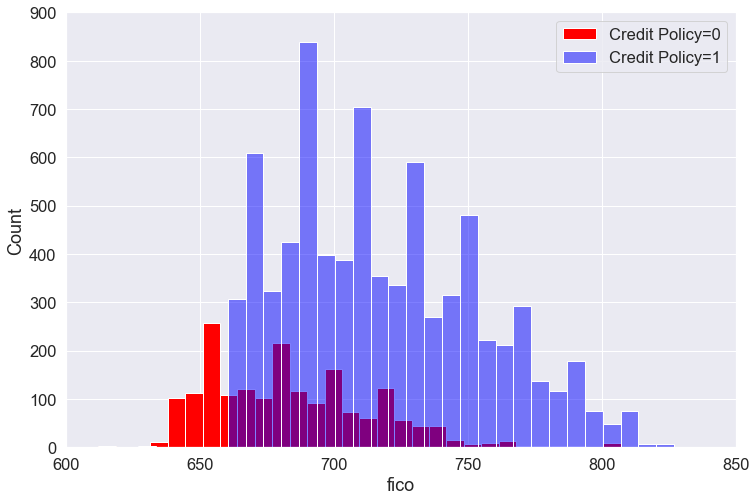

In [101]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
plt.figure(figsize = (12,8))

sns.histplot(data=dist_0, x= 'fico', color = 'red', label= 'Credit Policy=0', alpha=1, bins =30)
g = sns.histplot(data=dist_1, x= 'fico', color = 'blue', label= 'Credit Policy=1', alpha = 0.5, bins = 30)

g.set(xlim = (600, 850))
g.set(ylim = (0, 900))

plt.legend()
plt.show()

In [102]:
# The customers who met the credit underwriting criteria of LendingClub.com are much higher in number than customers who did not 
# meet the creteria.  Customers who met the criteria have scores ranging from apprximately 660 - 825, i.e. ranging from a fair 
# credit score to excellent scores.
# Approximately 840 customers have a credit score of 687 - 694 (the highest blue bar in the plot)
# Customers whose credit records did not meet the criteria (the red histogram) have credit scores ranging from 630 - 768 and 
# one or a few who had credit scores of above 800.

#### Create a similar figure, except this time select by the not.fully.paid column.

In [103]:
not_paid_0 = loans[loans['not.fully.paid'] == 0]
not_paid_1 = loans[loans['not.fully.paid'] == 1]

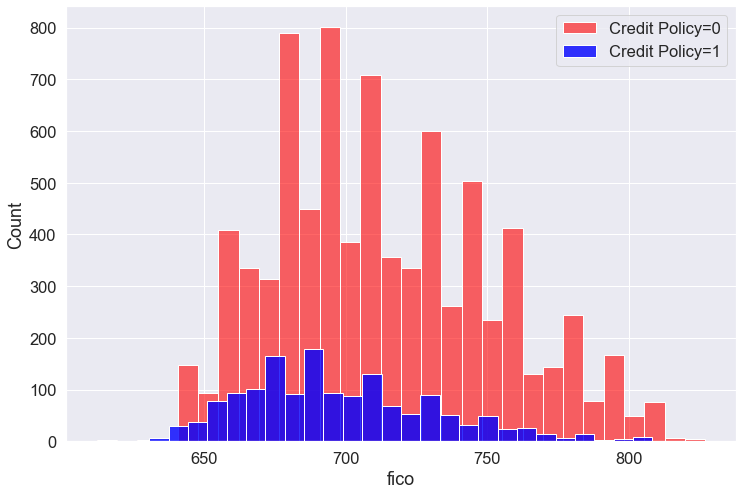

In [104]:
plt.figure(figsize = (12,8))

sns.histplot(data=not_paid_0, x= 'fico', color = 'red', label= 'Credit Policy=0', alpha=0.6, bins =30)
sns.histplot(data=not_paid_1, x= 'fico', color = 'blue', label= 'Credit Policy=1', alpha=0.8, bins = 30)

plt.legend()
plt.show()

In [105]:
# We can see that the vast number of customers did not fully pay their loans (indicated by the red histogram).

#### Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

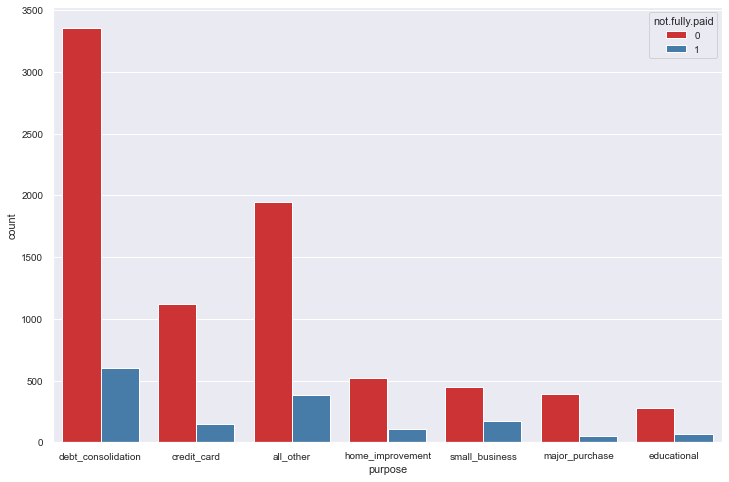

In [106]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 0.9)

sns.countplot(data= loans, x= 'purpose', hue = 'not.fully.paid', palette = 'Set1');

In [107]:
# Viewing the amount of fully paid loans vs not fully paid for all the different reasons customers took out a loan, we see that 
# that from customers who consolidated their debt, there are approximately 3350 who did not fully pay their loan and 600 who 
# fully paid their loan.
# We have a similar scenario with customers who took out a credit card.
# The best ratio of customers who paid their loan vs customers who did not fully pay their loan, are customers who took out 
# a loan for their small business improvements etc.

#### Let's see the trend between FICO score and interest rate. Recreate the following jointplot.

<Figure size 864x576 with 0 Axes>

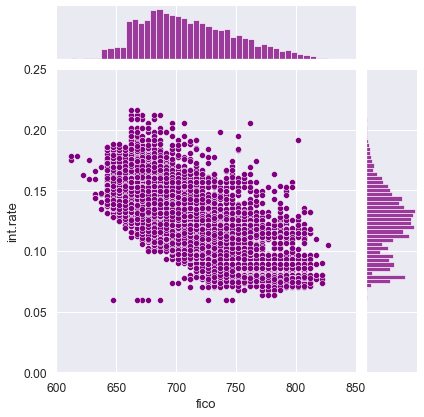

In [108]:
plt.figure(figsize = (12,8))
sns.set(font_scale =1.1)
f = sns.jointplot(data = loans, x= 'fico', y= 'int.rate', color = 'purple', kind = 'scatter' )
f.ax_joint.set_xlim((600, 850))
f.ax_joint.set_ylim((0, 0.25));

In [109]:
loans[['fico', 'int.rate']].corr()

,fico,int.rate
fico,1.000000,-0.714821
int.rate,-0.714821,1.000000


In [110]:
# From the scatter plot we see the general trend is that customers who had higher credit scores received a loan for a lower
# interest rate compared to customers who had a smaller credit score.
# There is a fairly strong correlation between the credit score of a customer and the interest rate they received. 

#### Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.

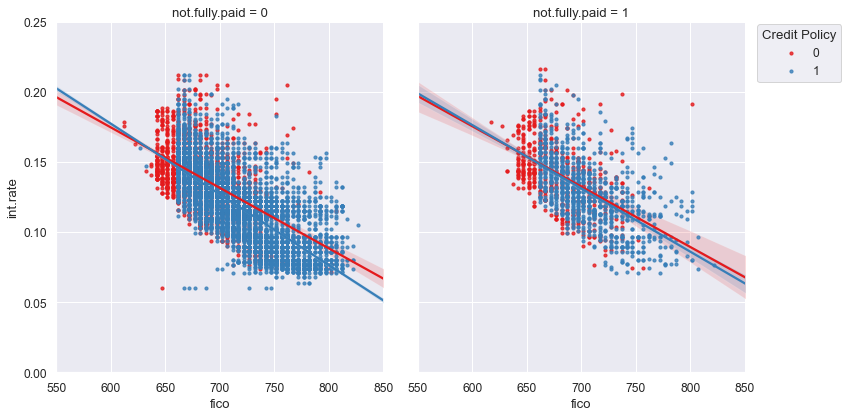

In [111]:
import matplotlib as mpl

mpl.rcParams['axes.xmargin'] = 0.5 
g = sns.lmplot(x="fico", y="int.rate", col="not.fully.paid", data=loans, hue = 'credit.policy', palette = 'Set1', 
               truncate = False, scatter_kws={"s": 10}, legend = False, height=6,aspect=1 )
mpl.rcParams['axes.xmargin'] = 0.05
g.fig.axes[-1].legend(bbox_to_anchor=(1.02, 1.01), loc ='upper left', title= 'Credit Policy')
g.set(xlim = (550, 850))
g.set(ylim = (0, 0.25))
plt.tight_layout()
plt.show()

In [112]:
# The first plot displays the data of customers that did not fully pay their loan, where the red point are customers who did not 
# meet the credit underwriting criteria of LendingClub.com and the blue points are customers that did meet the criteria.
# We can see from this plot that customers who did meet the criteria is much higher in number than customers who did not meet 
# the criteria by far.

# Considering the general trends for both plots, we see that they are more or less the same for customers who paid their loan 
# in full and for customers who did not fully pay their loan.  

# Setting up the Data

In [113]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

#### Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

In [114]:
cat_feats = ['purpose']

#### Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.

In [115]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [116]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

#### Use sklearn to split your data into a training set and a testing set as we've done in the past.

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Training a Decision Tree Model

We will train a single decision tree.

#### Import DecisionTreeClassifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

#### Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [121]:
dtree = DecisionTreeClassifier()

In [122]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
#### Create predictions from the test set and create a classification report and a confusion matrix.

In [123]:
predictions = dtree.predict(X_test)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2415
           1       0.21      0.25      0.23       459

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [126]:
print(confusion_matrix(y_test, predictions))

[[1978  437]
 [ 343  116]]


In [127]:
# We will compare the results of the single Decision Tree Model to the Random Forest Model results in the conclusion.

## Training the Random Forest model

#### Create an instance of the RandomForestClassifier class and fit it to our training data.

In [128]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Predicting off the y_test values and evaluating our model.

#### Predict the class of not.fully.paid for the X_test data.

In [129]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))

[[2404   11]
 [ 453    6]]


In [130]:
pd.crosstab(y_test, rfc_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2404,11,2415
1,453,6,459
All,2857,17,2874


In [137]:
# The confusion matrix above shows that our model predicted 84% of the 'Not fully paid' entries correctly as being not fully paid.
# 2404 clients from the test dataset did not fully pay their loan.  The model wrongly predicted that another 453 client also did 
# not fully pay their loan, which is where we get the 84% correct predictions from.

# 6 Clients entries were correctly predicted as 'fully paid' and 11 is wrongly predicted as 'fully paid', which is a 35%
# accurate prediction. 

#### Now create a classification report from the results. Do you get anything strange outcome or a warning?

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2415
           1       0.35      0.01      0.03       459

    accuracy                           0.84      2874
   macro avg       0.60      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874



In [ ]:
# From the classification report we can make the following deductions:
# The weighted and macro averages does not give us a good indication of the performance of this model.
# The model makes good predictions on customers who did not pay their loan fully, but bad predictions on customers who fully 
# paid their loan.

# The ratio of true positives (for customers who did not pay their loan in full) to all positives is 84%
# The measure of our model to correctly identify true negatives (customers who did not pay their loan in full) is 100%
# The f1-score, balancing the precision and recall results, of our model to predict true positives (customers who did not pay 
# their loan in full) is 91%

#### Viewing the classification report for the the Decision Tree Model again:

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2401
           1       0.23      0.25      0.24       473

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.74      2874



## Conclusion

#### Random Forest Model:
* From the confusion matrix we saw that 84% of customers did not fully pay their loan were predicted correctly and approximately 35% of customers that paid their loan in full were predicted correctly.
* The classification report also reflect these percentages as we have seen.

* The Random Forest Classifier is a good model for predicting the number of customers that did not fully pay their loan, but a bad model for the prediction of customers that fully paid their loan.

#### Decision Tree Model:
* This model performed worse on predicting the number of customers that did not fully pay their loan, but performed better in prediciting the number of customers that did pay their loan in full.  However, the accuracy of this model to make predictions on customers who did pay their loan in full is not good.

#### The Random Forest Model is the better model.  More feature engineering is needed to have the Random Forest Classifier perform better.